In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector as selector



In [10]:
from sklearn.preprocessing import OrdinalEncoder

# Load the data
signdata = pd.read_csv('/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/signdata.csv', encoding='latin-1')

# Make a copy of the data
processed_data = signdata.copy()

# Preprocessing for numerical features
numerical_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Drop specific columns
columns_to_drop = [
    'UlnarRotationM4.2.0', 'FlexionChangeM5.2.0', 'SpreadChangeM5.2.0',
    'SignTypeM5.2.0', 'MovementM5.2.0', 'RepeatedMovementM5.2.0',
    'MajorLocationM5.2.0', 'MinorLocationM5.2.0', 'SecondMinorLocationM5.2.0',
    'ContactM5.2.0', 'NonDominantHandshapeM5.2.0', 'UlnarRotationM5.2.0',
    'FlexionChangeM6.2.0', 'SpreadChangeM6.2.0', 'SignTypeM6.2.0',
    'MovementM6.2.0', 'RepeatedMovementM6.2.0', 'MajorLocationM6.2.0',
    'MinorLocationM6.2.0', 'SecondMinorLocationM6.2.0', 'ContactM6.2.0',
    'NonDominantHandshapeM6.2.0', 'UlnarRotationM6.2.0'
]
processed_data.drop(columns=columns_to_drop, inplace=True)

# Verify that remaining columns have names
if any(processed_data.columns.isnull()):
    # Explicitly assign column names if necessary
    processed_data.columns = [f'Column_{i}' for i in range(len(processed_data.columns))]

# Separate numerical and categorical columns
numerical_cols = processed_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = processed_data.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical features
imputer = SimpleImputer(strategy='median')
processed_data[numerical_cols] = scaler.fit_transform(imputer.fit_transform(processed_data[numerical_cols]))

# Handle missing values for categorical columns
for col in categorical_cols:
    processed_data[col].fillna(processed_data[col].mode()[0], inplace=True)

# Use OrdinalEncoder for categorical columns
ordinal_encoder = OrdinalEncoder()
for col in categorical_cols:
    processed_data[[col]] = ordinal_encoder.fit_transform(processed_data[[col]])

# Verify if processed_data contains column names for all columns
contains_column_names = all(isinstance(col, str) for col in processed_data.columns)

if contains_column_names:
    print("processed_data contains column names for all columns.")
else:
    print("processed_data does not contain column names for all columns.")


processed_data contains column names for all columns.


In [11]:
# Define the file path for the new CSV file
new_csv_path = '/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/processed_data.csv'

# Save the processed_data DataFrame to a new CSV file
processed_data.to_csv(new_csv_path, index=False)

# Print a message to confirm that the data has been saved
print(f"The processed data has been saved to '{new_csv_path}'.")

The processed data has been saved to '/Users/emilkoch/Library/Mobile Documents/com~apple~CloudDocs/Data Files/processed_data.csv'.


In [12]:
# Importing necessary libraries
import numpy as np

# Calculate Pearson correlation coefficients
correlation_matrix = processed_data.drop(columns=['GuessConsistency', 'GuessAccuracy', 'Transparency(M)', 'Transparency SD', 'Transparency Z', 'SignBankEnglishTranslations']).corrwith(processed_data['SignBankEnglishTranslations'])

# Sort correlation coefficients in descending order
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

# Print the top correlated features
print("Top correlated features with 'SignBankEnglishTranslations':")
print(sorted_correlations.head())

Top correlated features with 'SignBankEnglishTranslations':
SignBankLemmaID         0.384059
EntryID                 0.283692
LemmaID                 0.282393
SignBankAnnotationID    0.202292
Batch                   0.113896
dtype: float64


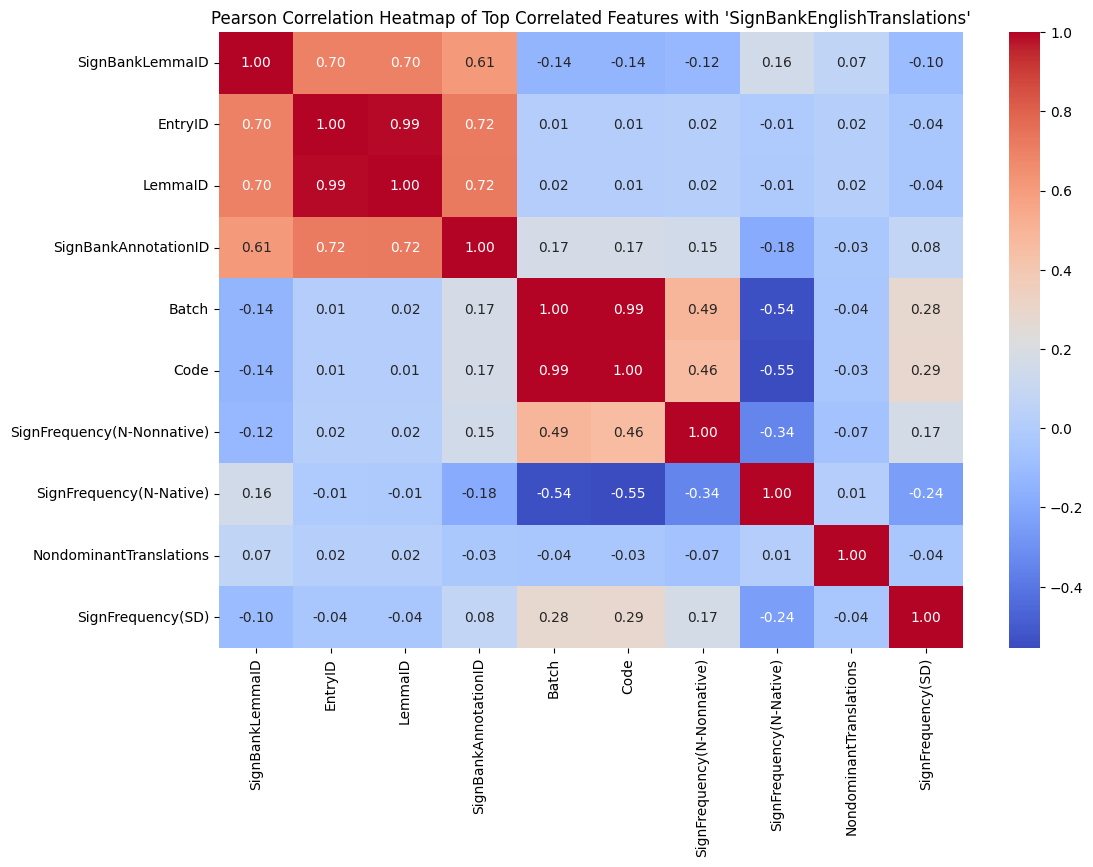

In [5]:
# Plot correlation heatmap if desired
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(processed_data[sorted_correlations.head(10).index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap of Top Correlated Features with 'SignBankEnglishTranslations'")
plt.show()

In [13]:
# Calculate the average correlation coefficient
average_correlation = sorted_correlations.mean()

# Print the average correlation coefficient
print("Average correlation coefficient:", average_correlation)

Average correlation coefficient: 0.03416604217858101


In [14]:
# Calculate quartiles of correlation coefficients
correlation_quartiles = sorted_correlations.describe(percentiles=[0.25, 0.5, 0.75])

# Print the quartiles
print("Correlation coefficient quartiles:")
print(correlation_quartiles)

Correlation coefficient quartiles:
count    148.000000
mean       0.034166
std        0.049615
min        0.000146
25%        0.007808
50%        0.021699
75%        0.040615
max        0.384059
dtype: float64


In [12]:
# Define the threshold based on the 75th percentile
threshold = correlation_quartiles.loc['75%']

# Filter out features with correlation coefficients above the threshold
strongly_correlated_features = sorted_correlations[sorted_correlations > threshold]

# Print the strongly correlated features
print("Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):")
print(strongly_correlated_features)

Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):
SignBankLemmaID                 0.384059
EntryID                         0.283692
LemmaID                         0.282393
SignBankAnnotationID            0.202292
Batch                           0.113896
Code                            0.113160
SignFrequency(N-Nonnative)      0.105201
SignFrequency(N-Native)         0.079614
NondominantTranslations         0.078538
SignFrequency(SD)               0.075122
ClipDuration(ms)                0.074219
SignDuration(ms)                0.073719
DominantTranslation             0.072156
SignOffset(ms)                  0.071017
FlexionChange.2.0Frequency      0.066380
Initialized.2.0                 0.063888
CDISemanticCategory             0.062302
SignBankReferenceID             0.061129
SignFrequency(SD-Native)        0.059383
InCDI                           0.058569
Iconicity(SD)                   0.056441
Handshape.2.0                   0.056322
FlexionCh

In [8]:
# Step 1: Prepare the Data
X = processed_data[strongly_correlated_features.index]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

NameError: name 'strongly_correlated_features' is not defined

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


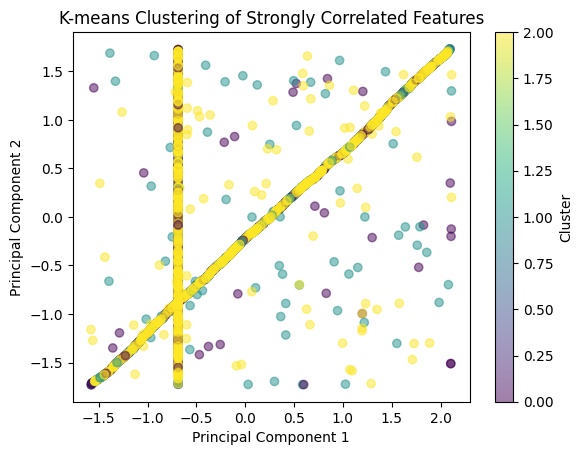

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare the Data
X = processed_data[strongly_correlated_features.index]

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-means Clustering
# Define the number of clusters
n_clusters = 3  # You can adjust this number based on your data and requirements
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the Clusters
# Visualize the clusters using the first two principal components (for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Strongly Correlated Features')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
print(strongly_correlated_features.shape)

(37,)


In [15]:
y = processed_data['SignBankEnglishTranslations']

In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the RFE selector with the RandomForestClassifier and desired number of features
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=20, step=1)

# Fit the RFE selector on the strongly correlated features
rfe_selector.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

# Print the selected features
print("Selected features after RFE:")
print(selected_features)

Selected features after RFE:
Index(['SignBankLemmaID', 'EntryID', 'LemmaID', 'SignBankAnnotationID', 'Code',
       'SignFrequency(SD)', 'ClipDuration(ms)', 'SignDuration(ms)',
       'SignOffset(ms)', 'SignBankReferenceID', 'SignFrequency(SD-Native)',
       'Iconicity(SD)', 'Handshape.2.0', 'SignFrequency(M-Native)',
       'EnglishWF(lg10)', 'SignFreq(Z-Nonnative)', 'SignFrequency(Z)',
       'SignFrequency(M)', 'SignFreq(Z-native)',
       'SignFrequency(SD-Nonnative)'],
      dtype='object')


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Assuming 'SignBankEnglishTranslations' is a continuous variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test Mean Absolute Error:", mae)

2024-02-23 13:41:39.228544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
55/55 [==============================] - 2s 8ms/step - loss: 379264.0625 - mae: 495.2555 - val_loss: 232854.2031 - val_mae: 380.1437
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 281115.5938 - mae: 423.5817 - val_loss: 219232.4375 - val_mae: 366.9028
Epoch 3/50
55/55 [==============================] - 0s 6ms/step - loss: 270247.9375 - mae: 416.9644 - val_loss: 224751.2969 - val_mae: 363.0543
Epoch 4/50
55/55 [==============================] - 0s 6ms/step - loss: 256637.1562 - mae: 398.0380 - val_loss: 209449.6406 - val_mae: 354.9935
Epoch 5/50
55/55 [==============================] - 0s 5ms/step - loss: 256960.6406 - mae: 403.0766 - val_loss: 206757.7656 - val_mae: 348.2607
Epoch 6/50
55/55 [==============================] - 0s 4ms/step - loss: 245005.9219 - mae: 391.0436 - val_loss: 208956.9375 - val_mae: 347.9438
Epoch 7/50
55/55 [==============================] - 0s 4ms/step - loss: 244723.9844 - mae: 389.9151 - val_loss: 206193.9688 - val_mae: 3

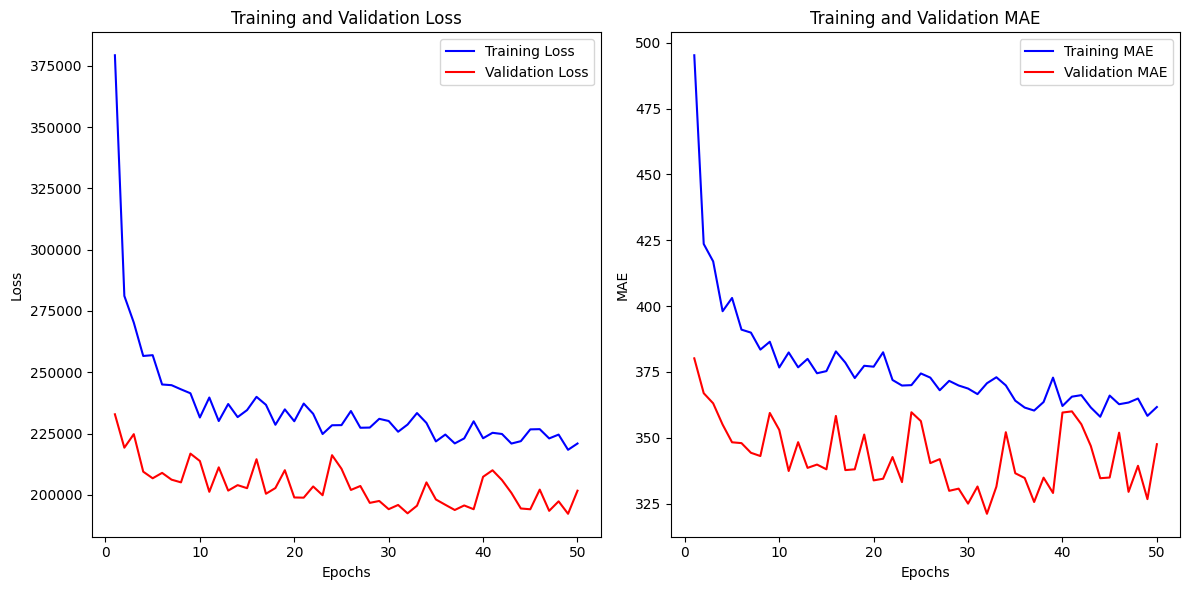

In [24]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, training_mae, 'b-', label='Training MAE')
plt.plot(epochs, validation_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='linear')  # Assuming 'SignBankEnglishTranslations' is a continuous variable
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test Mean Absolute Error:", mae)

Epoch 1/50
55/55 [==============================] - 4s 11ms/step - loss: 918209.5625 - mae: 845.3292 - val_loss: 918433.7500 - val_mae: 850.1995
Epoch 2/50
55/55 [==============================] - 0s 8ms/step - loss: 916344.0625 - mae: 844.7919 - val_loss: 916314.6875 - val_mae: 849.8315
Epoch 3/50
55/55 [==============================] - 0s 5ms/step - loss: 914063.5625 - mae: 844.0193 - val_loss: 916653.3750 - val_mae: 850.9123
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 910931.1875 - mae: 842.8376 - val_loss: 918336.1250 - val_mae: 852.5642
Epoch 5/50
55/55 [==============================] - 0s 5ms/step - loss: 906988.0625 - mae: 841.2297 - val_loss: 916812.5625 - val_mae: 852.1990
Epoch 6/50
55/55 [==============================] - 0s 5ms/step - loss: 901974.0000 - mae: 839.2871 - val_loss: 912634.0000 - val_mae: 849.6453
Epoch 7/50
55/55 [==============================] - 0s 5ms/step - loss: 897008.6250 - mae: 836.9811 - val_loss: 909746.1875 - val_mae: 

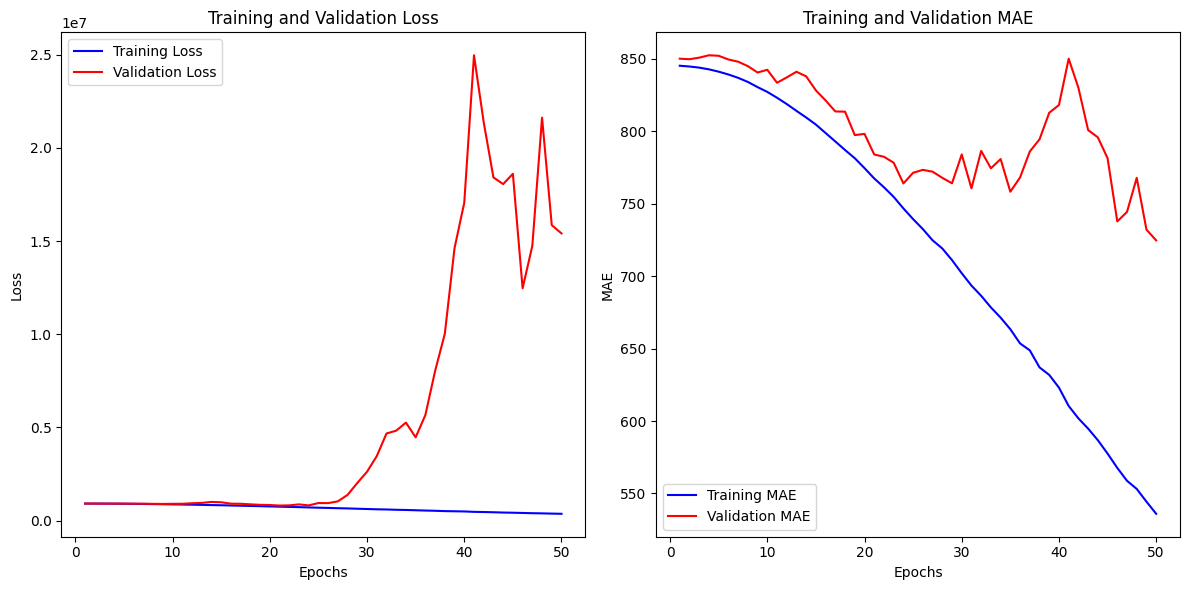

In [26]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, training_mae, 'b-', label='Training MAE')
plt.plot(epochs, validation_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Determine the number of unique classes in your dataset
num_classes = 1804  # Update this with the maximum label value in your dataset

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')  # Update the number of units to match the maximum label value
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
55/55 [==============================] - 2s 12ms/step - loss: 23.7882 - accuracy: 0.2003 - val_loss: 5.6313 - val_accuracy: 0.3050
Epoch 2/50
55/55 [==============================] - 0s 8ms/step - loss: 5.5277 - accuracy: 0.2641 - val_loss: 5.5658 - val_accuracy: 0.3028
Epoch 3/50
55/55 [==============================] - 1s 10ms/step - loss: 5.3359 - accuracy: 0.2652 - val_loss: 5.8268 - val_accuracy: 0.3028
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 5.1825 - accuracy: 0.2681 - val_loss: 6.3723 - val_accuracy: 0.3028
Epoch 5/50
55/55 [==============================] - 0s 7ms/step - loss: 5.1148 - accuracy: 0.2692 - val_loss: 6.4666 - val_accuracy: 0.3028
Epoch 6/50
55/55 [==============================] - 0s 7ms/step - loss: 4.9971 - accuracy: 0.2727 - val_loss: 6.3977 - val_accuracy: 0.3028
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 4.9492 - accuracy: 0.2738 - val_loss: 6.9488 - val_accuracy: 0.3050
Epoch 8/50
55/55 

Epoch 1/50
55/55 [==============================] - 1s 15ms/step - loss: 4.0428 - accuracy: 0.3054 - val_loss: 19.2132 - val_accuracy: 0.3028
Epoch 2/50
55/55 [==============================] - 0s 6ms/step - loss: 3.9160 - accuracy: 0.3106 - val_loss: 21.6673 - val_accuracy: 0.3028
Epoch 3/50
55/55 [==============================] - 1s 10ms/step - loss: 3.7288 - accuracy: 0.3186 - val_loss: 20.4923 - val_accuracy: 0.3028
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 3.6752 - accuracy: 0.3238 - val_loss: 19.8807 - val_accuracy: 0.3028
Epoch 5/50
55/55 [==============================] - 0s 9ms/step - loss: 3.7153 - accuracy: 0.3261 - val_loss: 19.6504 - val_accuracy: 0.3028
Epoch 6/50
55/55 [==============================] - 0s 7ms/step - loss: 3.7662 - accuracy: 0.3255 - val_loss: 22.5366 - val_accuracy: 0.3028
Epoch 7/50
55/55 [==============================] - 0s 7ms/step - loss: 3.8053 - accuracy: 0.3203 - val_loss: 19.5277 - val_accuracy: 0.3028
Epoch 8/50


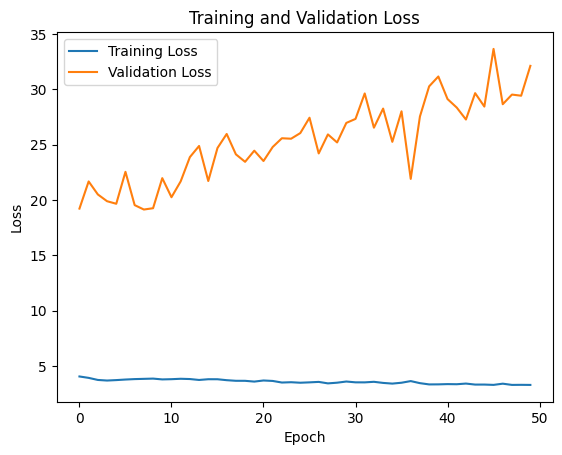

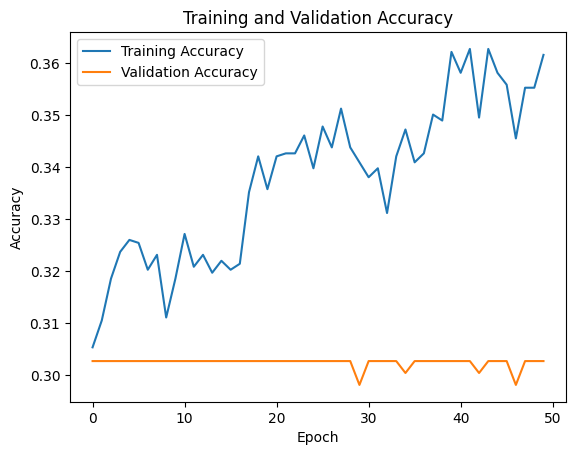

In [91]:
import matplotlib.pyplot as plt

# Get training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

# Determine the number of unique classes in your dataset
num_classes = 1804  # Update this with the maximum label value in your dataset

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(32, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(num_classes, activation='softmax')  # Update the number of units to match the maximum label value
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
55/55 [==============================] - 4s 15ms/step - loss: 7.2921 - accuracy: 0.1418 - val_loss: 6.1440 - val_accuracy: 0.3073
Epoch 2/50
55/55 [==============================] - 0s 7ms/step - loss: 6.4469 - accuracy: 0.2629 - val_loss: 5.2396 - val_accuracy: 0.3028
Epoch 3/50
55/55 [==============================] - 0s 7ms/step - loss: 5.7133 - accuracy: 0.2635 - val_loss: 5.3930 - val_accuracy: 0.3050
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 5.4789 - accuracy: 0.2641 - val_loss: 5.5932 - val_accuracy: 0.3050
Epoch 5/50
55/55 [==============================] - 1s 13ms/step - loss: 5.3866 - accuracy: 0.2646 - val_loss: 5.6533 - val_accuracy: 0.3050
Epoch 6/50
55/55 [==============================] - 0s 6ms/step - loss: 5.3035 - accuracy: 0.2652 - val_loss: 5.8207 - val_accuracy: 0.3050
Epoch 7/50
55/55 [==============================] - 0s 8ms/step - loss: 5.2258 - accuracy: 0.2658 - val_loss: 5.9676 - val_accuracy: 0.3050
Epoch 8/50
55/55 [

In [96]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ReduceLROnPlateau

# Determine the number of unique classes in your dataset
num_classes = 1804  # Update this with the maximum label value in your dataset

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(32, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(num_classes, activation='softmax')  # Update the number of units to match the maximum label value
])

# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

# Compile the model with initial learning rate
initial_learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with learning rate reduction
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3, callbacks=[reduce_lr], verbose=1)

Epoch 1/30
48/48 [==============================] - 7s 17ms/step - loss: 7.3729 - accuracy: 0.1043 - val_loss: 6.9164 - val_accuracy: 0.2630 - lr: 0.0010
Epoch 2/30
48/48 [==============================] - 0s 7ms/step - loss: 6.7416 - accuracy: 0.2710 - val_loss: 5.8037 - val_accuracy: 0.2661 - lr: 0.0010
Epoch 3/30
48/48 [==============================] - 0s 8ms/step - loss: 5.8260 - accuracy: 0.2730 - val_loss: 5.6643 - val_accuracy: 0.2661 - lr: 0.0010
Epoch 4/30
48/48 [==============================] - 0s 8ms/step - loss: 5.4255 - accuracy: 0.2743 - val_loss: 6.0132 - val_accuracy: 0.2645 - lr: 0.0010
Epoch 5/30
48/48 [==============================] - 0s 8ms/step - loss: 5.2991 - accuracy: 0.2736 - val_loss: 6.1337 - val_accuracy: 0.2645 - lr: 0.0010
Epoch 6/30
48/48 [==============================] - 0s 8ms/step - loss: 5.2113 - accuracy: 0.2769 - val_loss: 6.3332 - val_accuracy: 0.2645 - lr: 0.0010
Epoch 7/30
48/48 [==============================] - 1s 15ms/step - loss: 5.1342 -

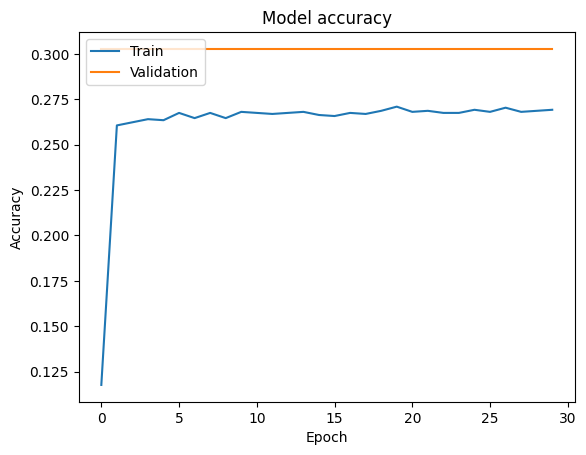

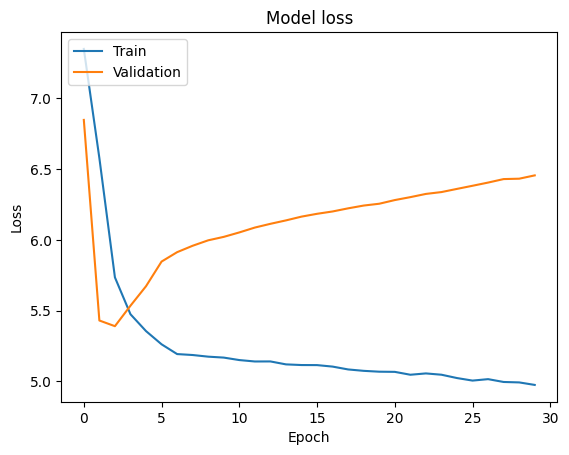

In [95]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [98]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize variables
max_features = 40
step = 20

# Iterate over different numbers of selected features
for num_features in range(step, max_features + 1, step):
    # Define the RFE selector with the RandomForestClassifier and current number of features
    rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=num_features, step=1)

    # Fit the RFE selector on the strongly correlated features
    rfe_selector.fit(X, y)

    # Get the selected features
    selected_features = X.columns[rfe_selector.support_]

    # Determine the number of unique classes in your dataset
    num_classes = len(np.unique(y))

    # Define the model architecture
    model = Sequential([
        Dense(128, activation='relu', input_shape=(len(selected_features),)),
        BatchNormalization(),  # Add batch normalization layer
        Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
        Dense(64, activation='relu'),
        BatchNormalization(),  # Add batch normalization layer
        Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
        Dense(32, activation='relu'),
        BatchNormalization(),  # Add batch normalization layer
        Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
        Dense(num_classes, activation='softmax')  # Update the number of units to match the maximum label value
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X[selected_features], y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
69/69 [==============================] - 8s 19ms/step - loss: 7.2274 - accuracy: 0.1433 - val_loss: 4.4689 - val_accuracy: 0.5138
Epoch 2/50
69/69 [==============================] - 1s 8ms/step - loss: 6.3550 - accuracy: 0.2089 - val_loss: 3.7123 - val_accuracy: 0.5138
Epoch 3/50
69/69 [==============================] - 1s 12ms/step - loss: 5.9905 - accuracy: 0.2098 - val_loss: 3.7952 - val_accuracy: 0.5138
Epoch 4/50
69/69 [==============================] - 1s 11ms/step - loss: 5.9188 - accuracy: 0.2094 - val_loss: 3.8591 - val_accuracy: 0.5138
Epoch 5/50
69/69 [==============================] - 1s 17ms/step - loss: 5.8683 - accuracy: 0.2089 - val_loss: 3.9224 - val_accuracy: 0.5156
Epoch 6/50
69/69 [==============================] - 1s 16ms/step - loss: 5.7974 - accuracy: 0.2117 - val_loss: 3.9008 - val_accuracy: 0.5156
Epoch 7/50
69/69 [==============================] - 1s 11ms/step - loss: 5.7232 - accuracy: 0.2107 - val_loss: 3.9082 - val_accuracy: 0.5174
Epoch 8/50
69/

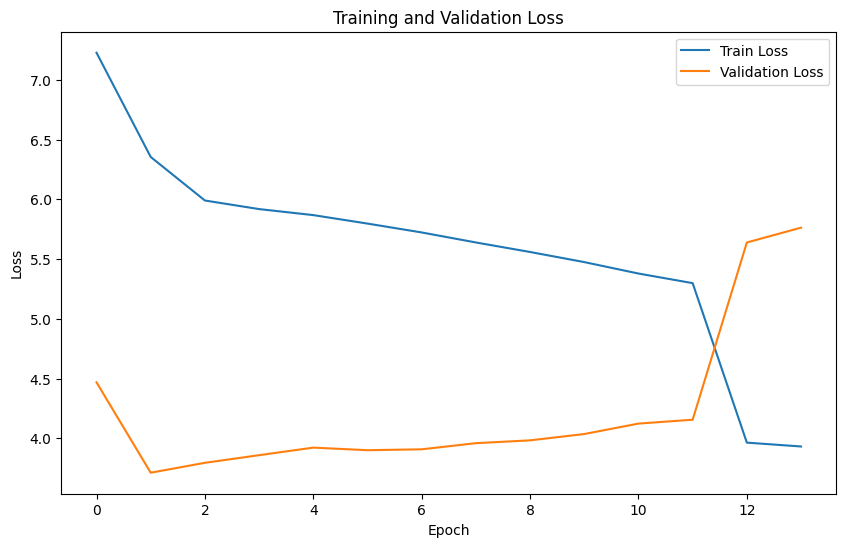

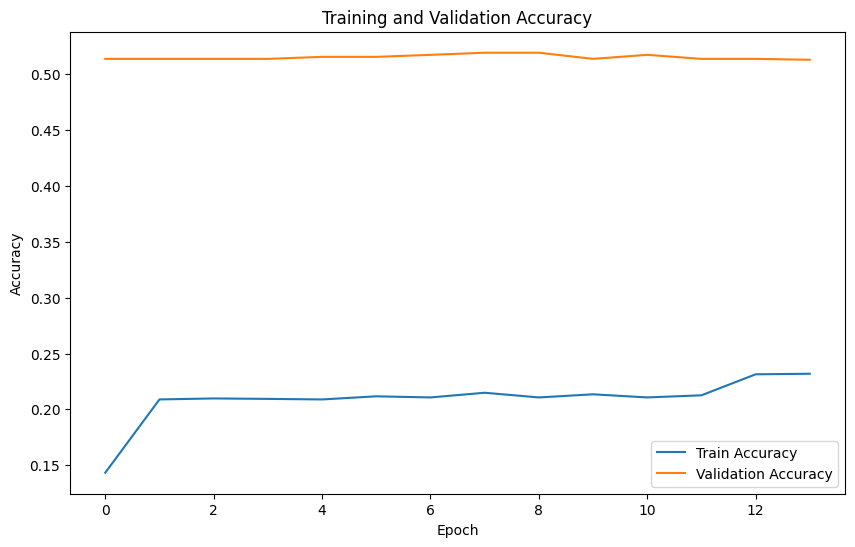

In [100]:
import matplotlib.pyplot as plt

# Define the training and validation loss/accuracy
train_loss = [7.2274, 6.3550, 5.9905, 5.9188, 5.8683, 5.7974, 5.7232, 5.6394, 5.5597, 5.4751, 5.3793, 5.2989, 3.9641, 3.9319]
val_loss = [4.4689, 3.7123, 3.7952, 3.8591, 3.9224, 3.9008, 3.9082, 3.9596, 3.9832, 4.0361, 4.1235, 4.1559, 5.6393, 5.7633]
train_accuracy = [0.1433, 0.2089, 0.2098, 0.2094, 0.2089, 0.2117, 0.2107, 0.2149, 0.2107, 0.2135, 0.2107, 0.2126, 0.2314, 0.2319]
val_accuracy = [0.5138, 0.5138, 0.5138, 0.5138, 0.5156, 0.5156, 0.5174, 0.5193, 0.5193, 0.5138, 0.5174, 0.5138, 0.5138, 0.513]

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
# Define the threshold based on the 75th percentile
threshold = correlation_quartiles.loc['50%']

# Filter out features with correlation coefficients above the threshold
strongly_correlated_features_50 = sorted_correlations[sorted_correlations > threshold]

# Print the strongly correlated features
print("Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):")
print(strongly_correlated_features)

Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):
SignBankLemmaID                 0.384059
EntryID                         0.283692
LemmaID                         0.282393
SignBankAnnotationID            0.202292
Batch                           0.113896
Code                            0.113160
SignFrequency(N-Nonnative)      0.105201
SignFrequency(N-Native)         0.079614
NondominantTranslations         0.078538
SignFrequency(SD)               0.075122
ClipDuration(ms)                0.074219
SignDuration(ms)                0.073719
DominantTranslation             0.072156
SignOffset(ms)                  0.071017
FlexionChange.2.0Frequency      0.066380
Initialized.2.0                 0.063888
CDISemanticCategory             0.062302
SignBankReferenceID             0.061129
SignFrequency(SD-Native)        0.059383
InCDI                           0.058569
Iconicity(SD)                   0.056441
Handshape.2.0                   0.056322
FlexionCh

In [24]:
from sklearn.feature_selection import mutual_info_classif

# Calculate information gain for each feature
info_gain = mutual_info_classif(X, y)

# Select the number of features equal to the number of strongly correlated features
num_selected_features = len(strongly_correlated_features_50)
selected_features_info_gain = X.columns[np.argsort(info_gain)[-num_selected_features:]] # Calculate quartiles of information gain
info_gain_quartiles = np.percentile(info_gain, [25, 50, 75])

# Print the quartiles of information gain
print("Information gain quartiles:")
print(info_gain_quartiles)

Information gain quartiles:
[0.1135356  0.73054481 1.22523135]


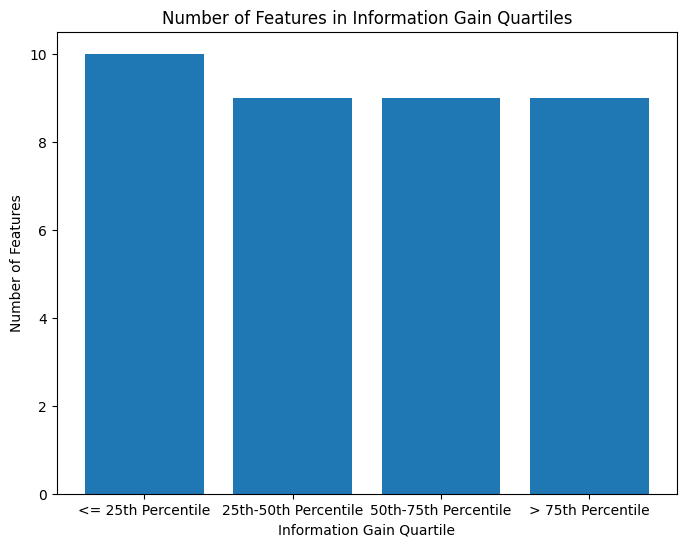

In [25]:
# Count the number of features falling within each quartile of information gain
num_features_quartile = [
    np.sum(info_gain <= info_gain_quartiles[0]),
    np.sum((info_gain > info_gain_quartiles[0]) & (info_gain <= info_gain_quartiles[1])),
    np.sum((info_gain > info_gain_quartiles[1]) & (info_gain <= info_gain_quartiles[2])),
    np.sum(info_gain > info_gain_quartiles[2])
]

# Plot the number of features in each quartile as bar plots
plt.figure(figsize=(8, 6))
plt.bar(['<= 25th Percentile', '25th-50th Percentile', '50th-75th Percentile', '> 75th Percentile'], num_features_quartile)
plt.title('Number of Features in Information Gain Quartiles')
plt.xlabel('Information Gain Quartile')
plt.ylabel('Number of Features')
plt.show()


In [26]:
# Define the threshold based on the 50th percentile
threshold_50 = info_gain_quartiles[1]

# Filter out features with information gain below the threshold
selected_features_info_gain_50 = X.columns[info_gain >= threshold_50]

# Print the selected features based on the 50th percentile threshold
print("Selected features with information gain above the 50th percentile:")
print(selected_features_info_gain_50)

Selected features with information gain above the 50th percentile:
Index(['SignBankLemmaID', 'EntryID', 'LemmaID', 'SignBankAnnotationID',
       'NondominantTranslations', 'DominantTranslation',
       'FlexionChange.2.0Frequency', 'Initialized.2.0', 'SignBankReferenceID',
       'Handshape.2.0', 'FlexionChange.2.0', 'MarkedHandshape.2.0',
       'D.Iconicity(N)', 'SelectedFingers.2.0Frequency',
       'MinorLocation.2.0Frequency', 'EnglishWF(lg10)', 'Compound.2.0',
       'SpreadChange.2.0', 'Phonological Complexity'],
      dtype='object')


In [113]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ReduceLROnPlateau

# Determine the number of unique classes in your dataset
num_classes = 1803  # Update this with the maximum label value in your dataset

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_info_gain_50], y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(32, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(num_classes, activation='softmax')  # Update the number of units to match the maximum label value
])

# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

# Compile the model with initial learning rate
initial_learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with learning rate reduction
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3, callbacks=[reduce_lr], verbose=1)

Epoch 1/30
48/48 [==============================] - 5s 17ms/step - loss: 7.3334 - accuracy: 0.1129 - val_loss: 6.5397 - val_accuracy: 0.2661 - lr: 0.0010
Epoch 2/30
48/48 [==============================] - 0s 8ms/step - loss: 6.5692 - accuracy: 0.2717 - val_loss: 5.5658 - val_accuracy: 0.2661 - lr: 0.0010
Epoch 3/30
48/48 [==============================] - 0s 8ms/step - loss: 5.7689 - accuracy: 0.2736 - val_loss: 5.6613 - val_accuracy: 0.2645 - lr: 0.0010
Epoch 4/30
48/48 [==============================] - 0s 10ms/step - loss: 5.4478 - accuracy: 0.2730 - val_loss: 5.8229 - val_accuracy: 0.2645 - lr: 0.0010
Epoch 5/30
48/48 [==============================] - 0s 8ms/step - loss: 5.3129 - accuracy: 0.2769 - val_loss: 6.0118 - val_accuracy: 0.2645 - lr: 0.0010
Epoch 6/30
48/48 [==============================] - 0s 8ms/step - loss: 5.2362 - accuracy: 0.2756 - val_loss: 6.0543 - val_accuracy: 0.2645 - lr: 1.0000e-04
Epoch 7/30
48/48 [==============================] - 0s 8ms/step - loss: 5.25

In [29]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

num_classes = 1803

# Define function for data augmentation
def augment_data(X_train, y_train):
    # Add random noise
    X_train_augmented = X_train + np.random.normal(loc=0, scale=0.1, size=X_train.shape)
    
    # Apply feature scaling
    X_train_augmented *= np.random.uniform(0.9, 1.1, size=X_train.shape)
    
    # Feature permutation
    X_train_augmented = shuffle(X_train_augmented, random_state=42)
    
    # Data shuffling
    X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train, random_state=42)
    
    return X_train_augmented, y_train_augmented

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_info_gain_50], y, test_size=0.2, random_state=42)

# Augment the training data
X_train_augmented, y_train_augmented = augment_data(X_train, y_train)

# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_augmented.shape[1],)),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(64, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(32, activation='relu'),
    BatchNormalization(),  # Add batch normalization layer
    Dropout(0.3),  # Add dropout layer with a dropout rate of 0.3
    Dense(num_classes, activation='softmax')  # Update the number of units to match the maximum label value
])

# Define learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

# Compile the model with initial learning rate
initial_learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation and learning rate reduction
history = model.fit(X_train_augmented, y_train_augmented, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[reduce_lr], verbose=1)

Epoch 1/50
69/69 [==============================] - 4s 13ms/step - loss: 7.5013 - accuracy: 0.0051 - val_loss: 7.4465 - val_accuracy: 0.0422 - lr: 0.0010
Epoch 2/50
69/69 [==============================] - 1s 9ms/step - loss: 7.3983 - accuracy: 0.0523 - val_loss: 7.5077 - val_accuracy: 0.1229 - lr: 0.0010
Epoch 3/50
69/69 [==============================] - 1s 8ms/step - loss: 7.2352 - accuracy: 0.1529 - val_loss: 7.4904 - val_accuracy: 0.2275 - lr: 0.0010
Epoch 4/50
69/69 [==============================] - 0s 7ms/step - loss: 6.9481 - accuracy: 0.2190 - val_loss: 7.5685 - val_accuracy: 0.2147 - lr: 0.0010
Epoch 5/50
69/69 [==============================] - 1s 7ms/step - loss: 6.7164 - accuracy: 0.2401 - val_loss: 7.7270 - val_accuracy: 0.2257 - lr: 1.0000e-04
Epoch 6/50
69/69 [==============================] - 1s 8ms/step - loss: 6.6802 - accuracy: 0.2461 - val_loss: 7.7924 - val_accuracy: 0.2312 - lr: 1.0000e-04
Epoch 7/50
69/69 [==============================] - 1s 10ms/step - loss: 

In [16]:
X_original = processed_data.drop('SignBankEnglishTranslations', axis=1)
y = processed_data['SignBankEnglishTranslations']

In [18]:
from sklearn.utils import shuffle

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Apply Random Oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Shuffle the resampled data
X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)

In [19]:
# Calculate Pearson correlation coefficients
correlation_matrix = X_train_resampled.drop(columns=['GuessConsistency', 'GuessAccuracy', 'Transparency(M)', 'Transparency SD', 'Transparency Z']).corrwith(y)

# Sort correlation coefficients in descending order
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

# Print the top correlated features
print("Top correlated features with 'SignBankEnglishTranslations':")
print(sorted_correlations.head())

Top correlated features with 'SignBankEnglishTranslations':
Initialized.2.0             0.098787
Neighborhood Density 2.0    0.071053
SignFreq(Z-native)          0.070757
SignFrequency(M-Native)     0.070676
SignFrequency(M)            0.068286
dtype: float64


In [21]:
# Calculate quartiles of correlation coefficients
correlation_quartiles = sorted_correlations.describe(percentiles=[0.25, 0.5, 0.75])

# Print the quartiles
print("Correlation coefficient quartiles:")
print(correlation_quartiles)

# Define the threshold based on the 75th percentile
threshold = correlation_quartiles.loc['75%']

# Filter out features with correlation coefficients above the threshold
strongly_correlated_features = sorted_correlations[sorted_correlations > threshold]

# Print the strongly correlated features
print("Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):")
print(strongly_correlated_features)

Correlation coefficient quartiles:
count    148.000000
mean       0.024928
std        0.019325
min        0.000189
25%        0.010110
50%        0.021798
75%        0.035557
max        0.098787
dtype: float64
Strongly correlated features with 'SignBankEnglishTranslations' (above 75th percentile):
Initialized.2.0                            0.098787
Neighborhood Density 2.0                   0.071053
SignFreq(Z-native)                         0.070757
SignFrequency(M-Native)                    0.070676
SignFrequency(M)                           0.068286
SignFrequency(Z)                           0.068017
ClipDuration(ms)                           0.064825
Iconicity(SD)                              0.063132
SignFrequency(M-Nonnative)                 0.061902
SignFreq(Z-Nonnative)                      0.061899
Parameter.Neighborhood.Density.2.0         0.061287
List                                       0.058079
Flexion.2.0Frequency                       0.057198
EnglishWF(lg10)          

In [22]:
X2 = X_train_resampled[strongly_correlated_features.index]

In [23]:
from sklearn.feature_selection import mutual_info_classif

# Calculate information gain for each feature
info_gain = mutual_info_classif(X2, y_train_resampled)

# Select the number of features equal to the number of strongly correlated features
num_selected_features = len(strongly_correlated_features)
selected_features_info_gain = X2.columns[np.argsort(info_gain)[-num_selected_features:]] # Calculate quartiles of information gain
info_gain_quartiles = np.percentile(info_gain, [25, 50, 75])

# Print the quartiles of information gain
print("Information gain quartiles:")
print(info_gain_quartiles)

Information gain quartiles:
[0.80946273 1.65240725 4.5855906 ]


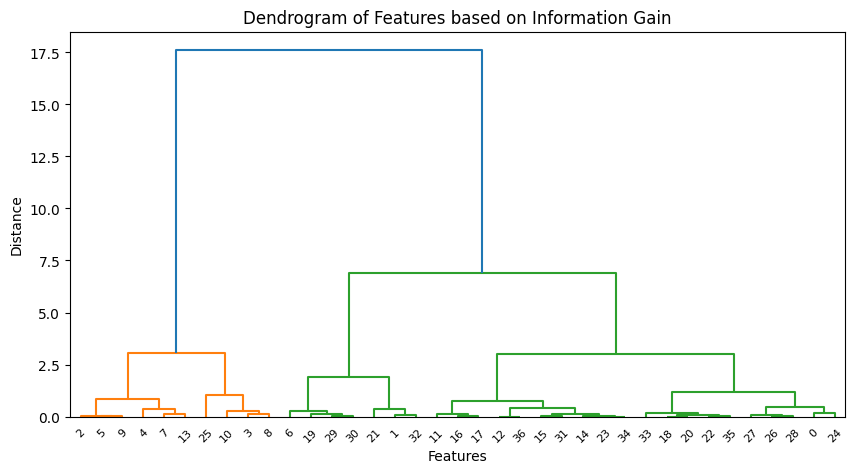

In [24]:
from scipy.cluster import hierarchy

# Perform hierarchical clustering
Z = hierarchy.linkage(info_gain.reshape(-1, 1), method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram of Features based on Information Gain')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

In [26]:
from sklearn.feature_selection import SelectKBest

# Define the number of features to select
k_features = 20  # Adjust this value as needed

# Select features using SelectKBest with mutual information score
selector = SelectKBest(mutual_info_classif, k=k_features)
selector.fit(X2, y_train_resampled)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Filter the features based on the selected indices
selected_features = X2.columns[selected_indices]

# Print the selected features
print("Selected features using SelectKBest with mutual information score:")
print(selected_features)

Selected features using SelectKBest with mutual information score:
Index(['Neighborhood Density 2.0', 'SignFreq(Z-native)',
       'SignFrequency(M-Native)', 'SignFrequency(M)', 'SignFrequency(Z)',
       'ClipDuration(ms)', 'Iconicity(SD)', 'SignFrequency(M-Nonnative)',
       'SignFreq(Z-Nonnative)', 'Parameter.Neighborhood.Density.2.0',
       'Flexion.2.0Frequency', 'EnglishWF(lg10)', 'SelectedFingers.2.0',
       'SignOffset(ms)', 'NonDominantHandshape.2.0', 'Item',
       'SignDuration(ms)', 'Handshape.2.0', 'Iconicity(N)',
       'DominantTranslation'],
      dtype='object')


In [45]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example data (replace with your own data)
X_train_selected = X_train_resampled[selected_features]
y_train = y_train_resampled

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Define your neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Example data (replace with your own data)
X_train_selected = X_train_resampled[selected_features]
y_train = y_train_resampled

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define dataset and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize model
input_size = len(selected_features)
hidden_size = 100  # You can adjust the hidden layer size as needed
output_size = len(y_train.unique())  # Number of unique classes
model = SimpleNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}")
            running_loss = 0.0

# Evaluation on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total}%')

In [ ]:
# Decode predictions
label_map = {value: key for key, value in y_train.items()}  # Assuming y_train contains the mapping of encoded numbers to labels
decoded_predictions = [label_map[pred] for pred in predictions]

print(f'Accuracy on test set: {100 * correct / total}%')
print("Actual predictions:", decoded_predictions)

In [54]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the RFE selector with the RandomForestClassifier and desired number of features
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=20, step=1)

# Fit the RFE selector on the filtered strongly correlated features
rfe_selector.fit(X2, y_train_resampled)

# Get the selected features
selected_features = X2.columns[rfe_selector.support_]

# Print the selected features
print("Selected features after RFE:")
print(selected_features)

KeyboardInterrupt: 